<a href="https://colab.research.google.com/github/lukiod/dl-college/blob/main/lab1_iris_dl_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
class LogisticRegressionFromScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        """Sigmoid function: Converts linear output to probability."""
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """Train the logistic regression model using gradient descent."""
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # Initialize weights
        self.bias = 0  # Initialize bias

        # Gradient descent
        for _ in range(self.epochs):
            # Linear model
            linear_model = np.dot(X, self.weights) + self.bias
            # Apply sigmoid function
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))  # Weight gradients
            db = (1 / n_samples) * np.sum(y_predicted - y)  # Bias gradient

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        """Predict class labels for input data."""
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]  # Threshold at 0.5

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = (iris.target != 0).astype(int)  # Convert to binary classification (setosa vs non-setosa)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for better convergence
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the custom logistic regression model
model = LogisticRegressionFromScratch(learning_rate=0.01, epochs=1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Setosa', 'Non-Setosa']))


Accuracy: 1.00
Confusion Matrix:
[[10  0]
 [ 0 20]]
Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Non-Setosa       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Loss: 0.00
Accuracy: 1.00


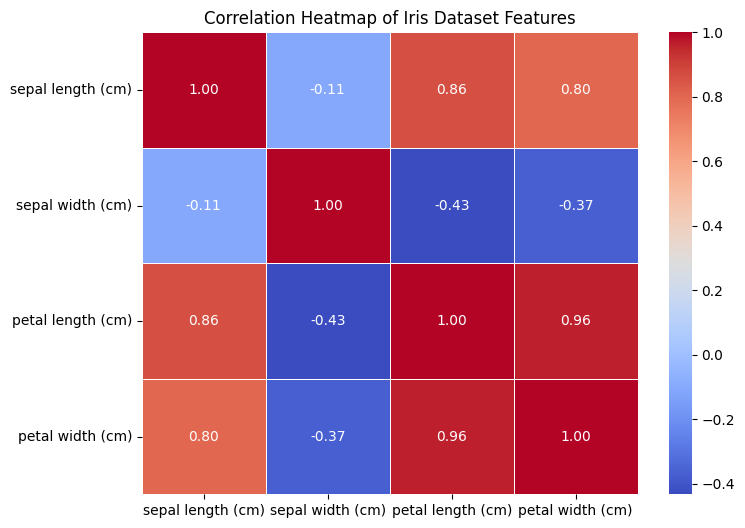

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error

# Load Iris dataset
iris = load_iris()
X = iris.data
y = (iris.target != 0).astype(int)  # Convert to binary classification (setosa vs non-setosa)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for better convergence
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train custom logistic regression model
model = LogisticRegressionFromScratch(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
loss = mean_squared_error(y_test, y_pred)
print(f"Loss: {loss:.2f}")

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# ---- Correlation Map ----

# Convert the scaled features to a DataFrame for easier manipulation
X_df = pd.DataFrame(X_train, columns=iris.feature_names)

# Compute the correlation matrix
corr_matrix = X_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title("Correlation Heatmap of Iris Dataset Features")
plt.show()


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Print the coefficients for each feature
print("Coefficients for each feature:")
for i, f in enumerate(iris.feature_names):
    print(f"{f}: {reg.coef_[i]:.4f}")

# Now, calculate MSE for each class
y_pred = reg.predict(X_test)
mse_per_class = {}

# Loop over each class and compute the Mean Squared Error (MSE) for that class
for class_label in np.unique(y):
    # Find the indices where the true labels are equal to the class label
    class_indices = (y_test == class_label)

    # Calculate the Mean Squared Error (MSE) for that class
    class_loss = np.mean(np.square(y_pred[class_indices] - y_test[class_indices]))

    # Store the loss for this class
    mse_per_class[class_label] = class_loss

# Print the loss (MSE) for each class
print("\nMSE for each class:")
for class_label, mse in mse_per_class.items():
    class_name = iris.target_names[class_label]
    print(f"Loss for class {class_name}: {mse:.2f}")


Coefficients for each feature:
sepal length (cm): -0.1163
sepal width (cm): -0.0598
petal length (cm): 0.2549
petal width (cm): 0.5476

MSE for each class:
Loss for class setosa: 0.00
Loss for class versicolor: 0.07
Loss for class virginica: 0.04
